In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings


In [3]:
# Supressing update warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("data.csv", encoding="cp1252")
data

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.0,50.0,143.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.0,46.0,171.0,NaN,"Inside Rampal Industries,ULUBERIA",NaN,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

In [13]:
# Cleaning up name changes
data.state = data.state.replace({'Uttaranchal': 'Uttarakhand'})
data.state[data.location == "Jamshedpur"] = data.state[data.location == "Jamshedpur"].replace({"Bihar": "Jharkhand"})


In [15]:
# Changing types to uniform format
types = {
"Residential": "R",
"Residential and others": "RO",
"Residential, Rural and other Areas": "RRO",
"Industrial Area": "I",
"Industrial Areas": "I",
"Industrial": "I",
"Sensitive Area": "S",
"Sensitive Areas": "S",
"Sensitive": "S",
np.nan: "RRO"
}
data.type = data.type.replace(types)
data.head()


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,I,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,RRO,6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,RRO,6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,I,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [17]:
# defining columns of importance, which shall be used reguarly
VALUE_COLS = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']


In [19]:
# invoking SimpleImputer to fill missing values
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data[VALUE_COLS] = imputer.fit_transform(data[VALUE_COLS])

In [21]:
# checking to see if the dataset has any null values left over and the format
print(data.isnull().sum())
data.tail()


stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                                0
so2                                 0
no2                                 0
rspm                                0
spm                                 0
location_monitoring_station     27491
pm2_5                               0
date                                7
dtype: int64


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
435737,SAMP,24-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,22.000000,50.000000,143.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-24
435738,SAMP,29-12-15,West Bengal,ULUBERIA,West Bengal State Pollution Control Board,RIRUO,20.000000,46.000000,171.000000,220.78348,"Inside Rampal Industries,ULUBERIA",40.791467,2015-12-29
435739,NaN,NaN,andaman-and-nicobar-islands,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435740,NaN,NaN,Lakshadweep,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN
435741,NaN,NaN,Tripura,NaN,NaN,RRO,10.829414,25.809623,108.832784,220.78348,NaN,40.791467,NaN


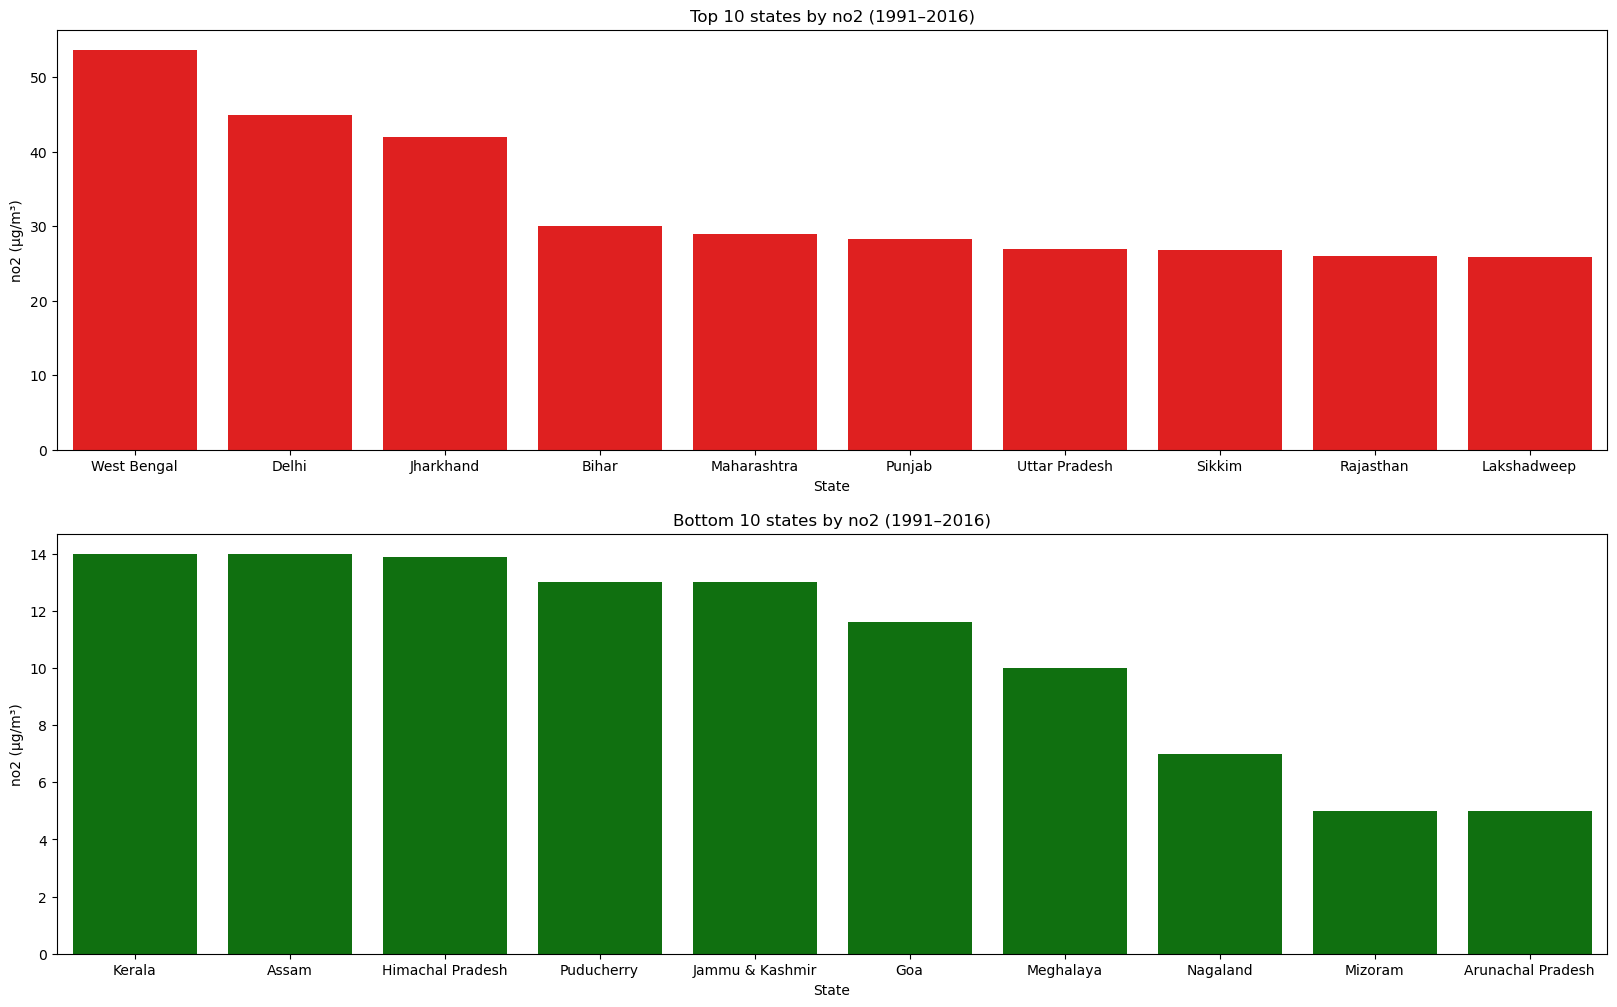

In [25]:
# Plotting highest and lowest ranking states
# defining a function to find and plot the top 10 and bottom 10 states for a given indicator (defaults to SO2)
def top_and_bottom_10_states(indicator="so2"):
    fig, ax = plt.subplots(2, 1, figsize=(20, 12))
    ind = data[[indicator, 'state']].groupby('state', as_index=False).median().sort_values(by=indicator, ascending=False)

    top10 = sns.barplot(x='state', y=indicator, data=ind[:10], ax=ax[0], color='red')
    top10.set_title(f"Top 10 states by {indicator} (1991–2016)")
    top10.set_ylabel(f"{indicator} (µg/m³)")
    top10.set_xlabel("State")

    bottom10 = sns.barplot(x='state', y=indicator, data=ind[-10:], ax=ax[1], color='green')
    bottom10.set_title(f"Bottom 10 states by {indicator} (1991–2016)")
    bottom10.set_ylabel(f"{indicator} (µg/m³)")
    bottom10.set_xlabel("State")

# Example call
top_and_bottom_10_states("no2")


In [43]:
# Replace "no2" with any indicator name to inspect that column
indicator = "no2"

print("dtype:", data[indicator].dtype)
print("sample values:")
print(data[indicator].head(20))

# Find values that cannot be converted to numeric (after stripping)
s = data[indicator].astype(str).str.strip()
numeric_series = pd.to_numeric(s.str.replace(',', ''), errors='coerce')

non_numeric_mask = numeric_series.isna() & s.notna() & (s != 'nan')
print("Non-numeric count:", non_numeric_mask.sum())

# Show examples of problematic values
print("Examples of non-numeric values:", pd.Series(s[non_numeric_mask].unique())[:30].tolist())

# Show some full rows to inspect context
display(data.loc[non_numeric_mask].head(10))


dtype: float64
sample values:
0     17.4
1      7.0
2     28.5
3     14.7
4      7.5
5     25.7
6     17.1
7      8.7
8     23.0
9      8.9
10    18.6
11    14.1
12    11.8
13    19.3
14     8.2
15    12.1
16    10.2
17     9.9
18    11.5
19    12.3
Name: no2, dtype: float64
Non-numeric count: 0
Examples of non-numeric values: []


,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date


In [45]:
import numpy as np
import re

def clean_indicator_column(df, indicator):
    # Work on a copy to avoid accidental overwrite
    s = df[indicator].astype(str)  # make string so we can clean consistently
    
    # Remove non-printable / invisible unicode characters
    # (strip non-ascii; if you need to preserve non-ascii numeric symbols change this)
    s = s.apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))
    
    # strip whitespace
    s = s.str.strip()
    
    # common placeholders to treat as missing
    placeholders = ['NA','N/A','na','n/a','-', '--', '.', '', 'nan', 'None', 'NULL']
    s_clean = s.replace(placeholders, np.nan)
    
    # remove commas in numbers (thousands separators)
    s_clean = s_clean.str.replace(',', '', regex=False)
    
    # if there are percent signs or other units remove them (optional)
    s_clean = s_clean.str.replace('%', '', regex=False)
    s_clean = s_clean.str.replace('µg/m3', '', regex=False)  # if your data accidentally contains units
    
    # final numeric conversion (coerce invalid -> NaN)
    numeric = pd.to_numeric(s_clean, errors='coerce')
    
    return numeric

# Example: apply cleaning and preview
data['_clean_no2'] = clean_indicator_column(data, 'no2')
print("After cleaning: non-null count:", data['_clean_no2'].notna().sum())
display(data[['_clean_no2','no2']].head(10))


After cleaning: non-null count: 435742


,_clean_no2,no2
0,17.4,17.4
1,7.0,7.0
2,28.5,28.5
3,14.7,14.7
4,7.5,7.5
5,25.7,25.7
6,17.1,17.1
7,8.7,8.7
8,23.0,23.0
9,8.9,8.9


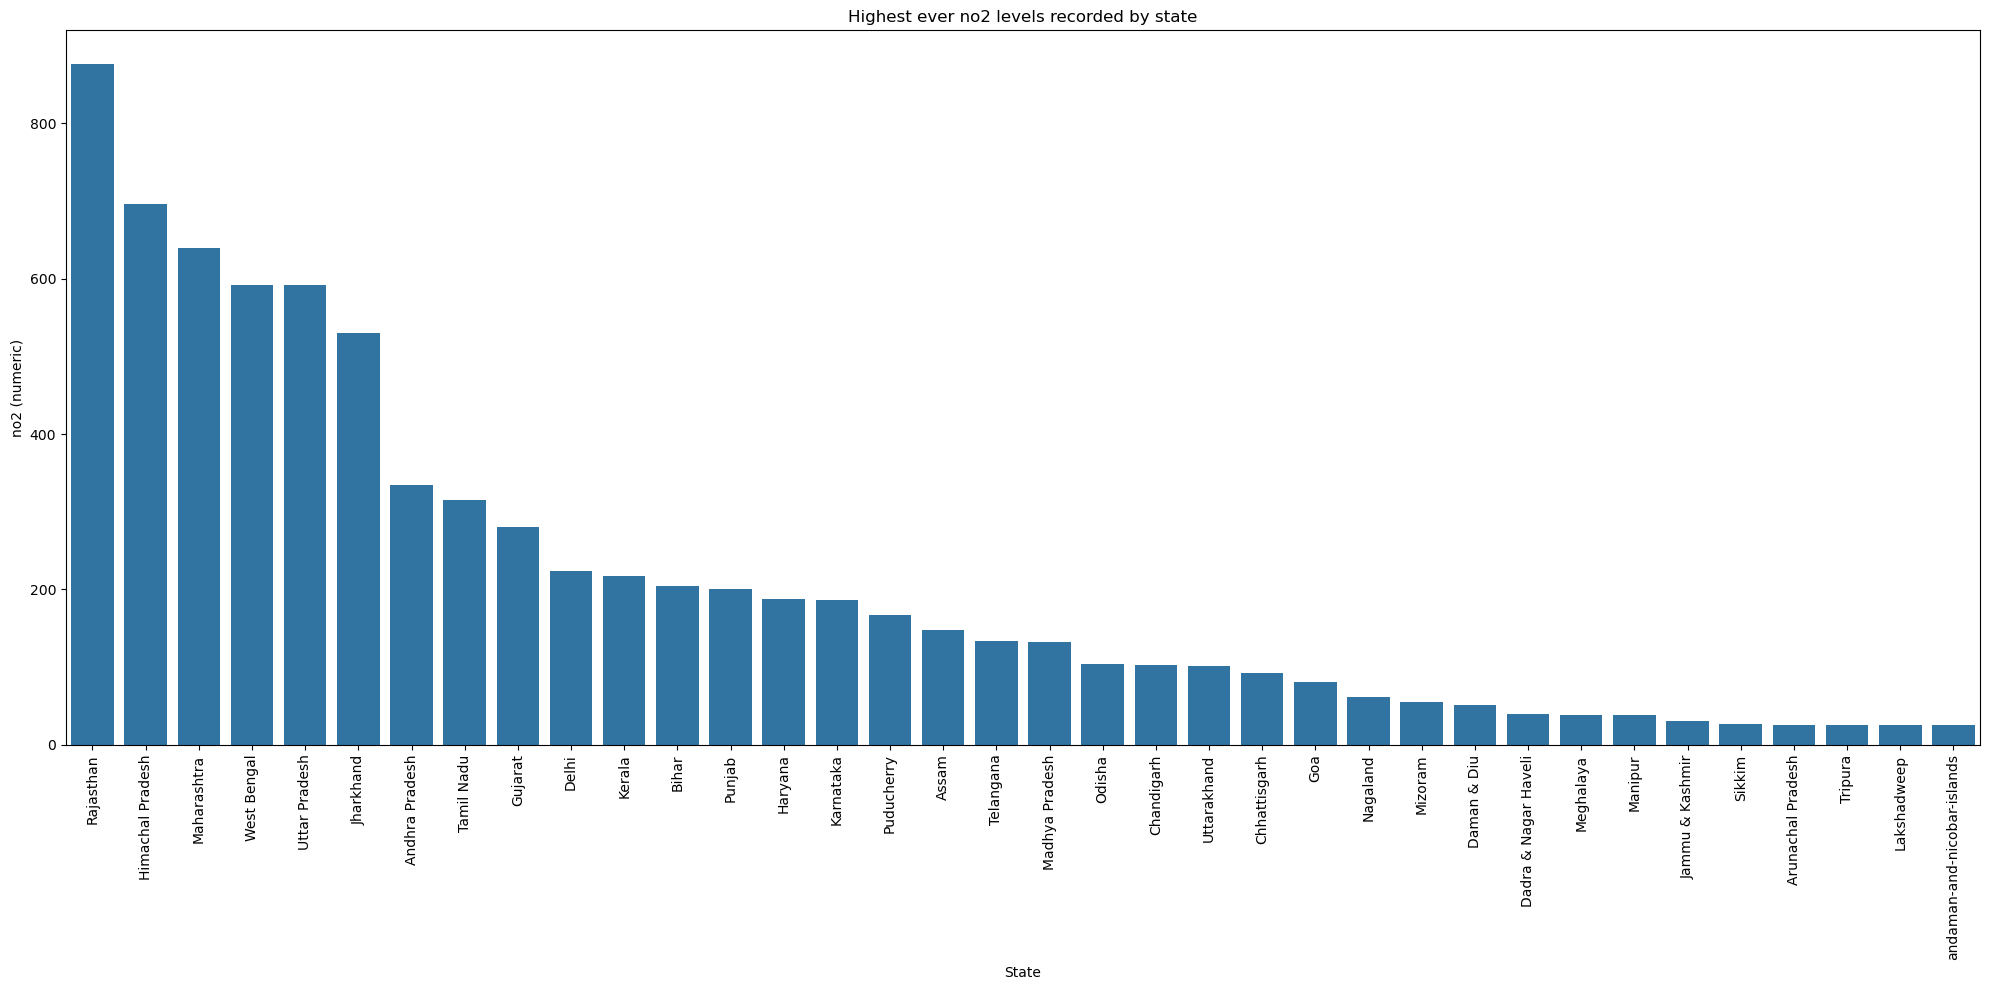

,state,max_value
0,Andhra Pradesh,334.900000
1,Arunachal Pradesh,25.809623
2,Assam,147.900000
3,Bihar,203.800000
4,Chandigarh,103.000000


,state,location,date,no2,no2_num
0,Andhra Pradesh,Hyderabad,2011-11-22,334.900000,334.900000
1,Arunachal Pradesh,Itanagar,2014-09-12,25.809623,25.809623
2,Assam,Guwahati,1993-01-01,147.900000,147.900000
3,Bihar,Patna,2007-08-02,203.800000,203.800000
4,Chandigarh,Chandigarh,2004-08-31,103.000000,103.000000


In [47]:
def highest_levels_recorded(indicator="so2", return_rows=False, overwrite=False):
    """
    Plot highest ever recorded numeric level per state for `indicator`.
    If return_rows=True, also return a DataFrame with the row (state, location, date, value) where max occurred.
    If overwrite=True, overwrite data[indicator] with the cleaned numeric values.
    """
    # 1) Clean & convert to numeric
    numeric = clean_indicator_column(data, indicator)
    
    if overwrite:
        data[indicator] = numeric  # optional: overwrite original
    
    # 2) drop missing numeric values and prepare df
    df = data.loc[numeric.notna(), :].copy()
    df[indicator + "_num"] = numeric[numeric.notna()]  # numeric values in new col
    
    if df.empty:
        raise ValueError(f"No numeric values available for indicator '{indicator}'. Run the diagnostic to inspect.")
    
    # 3) Group by state and get max numeric value
    grouped = df.groupby('state', as_index=False)[indicator + "_num"].max().rename(columns={indicator + "_num": "max_value"})
    
    # 4) Plot
    plt.figure(figsize=(20, 10))
    sns.barplot(x='state', y='max_value', data=grouped.sort_values('max_value', ascending=False))
    plt.title(f"Highest ever {indicator} levels recorded by state")
    plt.ylabel(f"{indicator} (numeric)")
    plt.xlabel("State")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # 5) Optionally return rows where max occurred (first occurrence if multiple)
    if return_rows:
        # find idx of max per state in df
        idx = df.groupby('state')[indicator + "_num"].idxmax()
        rows = df.loc[idx, ['state', 'location', 'date', indicator, indicator + "_num"]].reset_index(drop=True)
        return grouped, rows

# Example usage:
grouped_df, max_rows = highest_levels_recorded("no2", return_rows=True)
display(grouped_df.head())
display(max_rows.head())


In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import re

def type_avg_clean_plot(indicator=None, show_coercions=True):
    # 1) Check inputs
    try:
        cols = VALUE_COLS.copy()
    except NameError:
        raise NameError("Define VALUE_COLS = ['so2','no2', ...] before calling this function.")
    required = cols + ['type', 'date']
    missing = [c for c in required if c not in data.columns]
    if missing:
        raise KeyError("Missing required columns in data:", missing)

    # 2) Work on a copy and clean each value col to numeric
    df = data[required].copy()
    coerced_report = {}
    for c in cols:
        # make string, strip invisible chars, remove commas/units, then coerce
        s = df[c].astype(str).apply(lambda x: re.sub(r'[^\x00-\x7F]+','', x)).str.strip()
        s = s.str.replace(',', '', regex=False)
        # remove common unit strings if present (customize if needed)
        s = s.str.replace('µg/m3', '', regex=False)
        s = s.replace({'NA': None, 'N/A': None, 'na': None, '': None, '--': None, '-': None})
        numeric = pd.to_numeric(s, errors='coerce')
        coerced = numeric.isna() & df[c].notna()
        coerced_report[c] = coerced.sum()
        df[c] = numeric

    if show_coercions:
        print("Coerced-to-NaN counts per column:", coerced_report)

    # 3) Group by type and compute mean — pandas will only average numeric cols
    numeric_cols = [c for c in cols if pd.api.types.is_numeric_dtype(df[c])]
    grouped = df.groupby('type', as_index=True)[numeric_cols].mean()
    print("Grouped dataframe shape:", grouped.shape)
    display(grouped.head())

    if grouped.empty:
        print("No numeric data to plot after cleaning.")
        return grouped

    # 4) Plot
    plt.figure(figsize=(12,6))
    if indicator:
        if indicator not in grouped.columns:
            raise KeyError(f"Indicator '{indicator}' not found after cleaning. Available columns: {grouped.columns.tolist()}")
        series = grouped[indicator].dropna()
        if series.empty:
            print(f"No numeric values for '{indicator}' to plot.")
            return grouped
        sns.barplot(x=series.index.astype(str), y=series.values)
        plt.title(f"Pollutant average by type for {indicator}")
        plt.ylabel(f"{indicator} (numeric)")
    else:
        grouped.plot(kind='bar', figsize=(12,6))
        plt.title("Pollutant average by type (all indicators)")

    plt.xlabel("Type")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    return grouped

# Example usage:
# grouped_df = type_avg_clean_plot('so2')   # plot specific indicator
# grouped_df = type_avg_clean_plot()        # plot all indicators


In [66]:
# shows which VALUE_COLS are non-numeric or contain bad values
import pandas as pd
try:
    cols = VALUE_COLS
except NameError:
    raise NameError("Define VALUE_COLS = ['so2','no2', ...] first")

print("Dtypes of VALUE_COLS:")
print(data[cols].dtypes)

non_numeric = [c for c in cols if not pd.api.types.is_numeric_dtype(data[c])]
print("Non-numeric value columns:", non_numeric)

# show examples of bad values per problematic column
for c in non_numeric:
    s = data[c].astype(str).str.strip().str.replace(',', '')
    bad = s[pd.to_numeric(s, errors='coerce').isna() & s.notna()].unique()[:20]
    print(f"\nExamples in {c}:", bad.tolist())


Dtypes of VALUE_COLS:
so2      float64
no2      float64
rspm     float64
spm      float64
pm2_5    float64
dtype: object
Non-numeric value columns: []


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re

def location_avgs(state, indicator="so2"):
    # 1) Validate VALUE_COLS
    try:
        cols = VALUE_COLS.copy()
    except NameError:
        raise NameError("Define VALUE_COLS first, e.g. VALUE_COLS = ['so2','no2','rspm', ...]")

    # 2) Work on a copy and coerce pollutant columns to numeric
    df = data.copy()
    for c in cols:
        # remove invisible chars and commas, strip, remove common unit text, then coerce
        df[c] = (df[c].astype(str)
                     .apply(lambda x: re.sub(r'[^\x00-\x7F]+', '', x))  # strip non-ascii invisibles
                     .str.strip()
                     .str.replace(',', '', regex=False)
                     .str.replace('µg/m3', '', regex=False)
                )
        df[c] = pd.to_numeric(df[c], errors='coerce')

    # 3) Group only numeric pollutant columns (do NOT include 'date')
    locs = df.groupby(['state', 'location'])[cols].mean()

    # 4) check state exists
    if state not in locs.index.get_level_values(0):
        print(f"State '{state}' not found in data index. Available states (sample):",
              list(locs.index.get_level_values(0).unique())[:20])
        return

    # 5) select rows for the state and plot
    state_avgs = locs.loc[state].reset_index()   # now a dataframe with columns: location + VALUE_COLS
    if indicator not in state_avgs.columns:
        print(f"Indicator '{indicator}' not available after cleaning. Available indicators:", state_avgs.columns.tolist())
        return

    plt.figure(figsize=(12,6))
    sns.barplot(x='location', y=indicator, data=state_avgs.sort_values(indicator, ascending=False))
    plt.title(f"Location-wise average for {indicator.upper()} in {state}")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


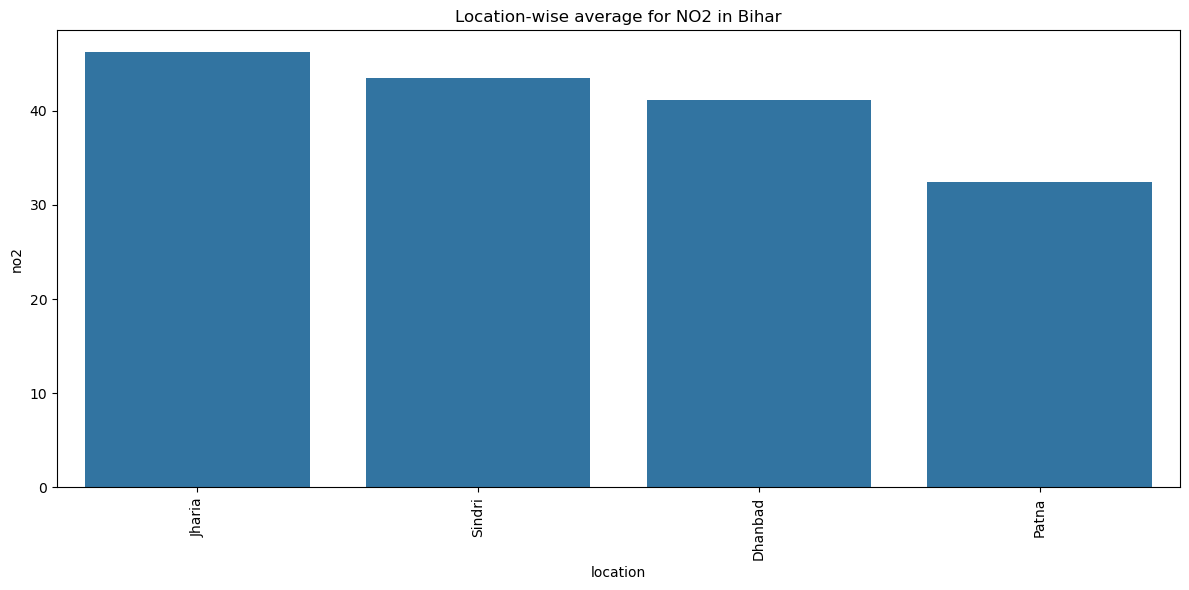

In [70]:
location_avgs("Bihar", "no2")
